In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [39]:
df = pd.read_csv("cleaned_pgatour_data.csv")
df.columns

Index(['year', 'player', 'rounds', 'country', 'sg_total',
       'par_3_scoring_average', 'par_4_scoring_average',
       'par_5_scoring_average', 'sg_off_the_tee', 'driving_distance',
       'driving_accuracy_percentage', 'going_for_the_green',
       'going_for_the_green___hit_green_pct.', 'gir_percentage___200+_yards',
       'gir_percentage___175_200_yards', 'approaches_from_>_275_yards',
       'approaches_from_250_275_yards', 'approaches_from_225_250_yards',
       'approaches_from_200_225_yards', 'approaches_from_175_200_yards',
       'gir_percentage___150_175_yards', 'gir_percentage___125_150_yards',
       'gir_percentage___100_125_yards', 'approaches_from_150_175_yards',
       'approaches_from_125_150_yards', 'approaches_from_100_125_yards',
       'fairway_proximity', 'rough_proximity', 'sg_approach_the_green',
       'gir_percentage___<_100_yards', 'approaches_from_inside_100_yards',
       'sg_around_the_green', 'scrambling', 'proximity_to_hole_(arg)',
       'scrambling

In [40]:
dropped_cols = ['rounds', 'country']
df = df.drop(columns=dropped_cols)

In [41]:
df.to_csv("prePCA.csv", index=False)

In [42]:
pca_df = df.copy()

In [43]:
pca_df.dropna(inplace=True)

In [44]:
par5_aggressiveness = [
    # 'par_5_scoring_average',
    # 'going_for_the_green',
    'going_for_the_green___hit_green_pct.'
]

In [45]:
scoring_cols = [
    # 'sg_total',
    'par_3_scoring_average', 'par_4_scoring_average',
]

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_56696/3448613608.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_56696/3448613608.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


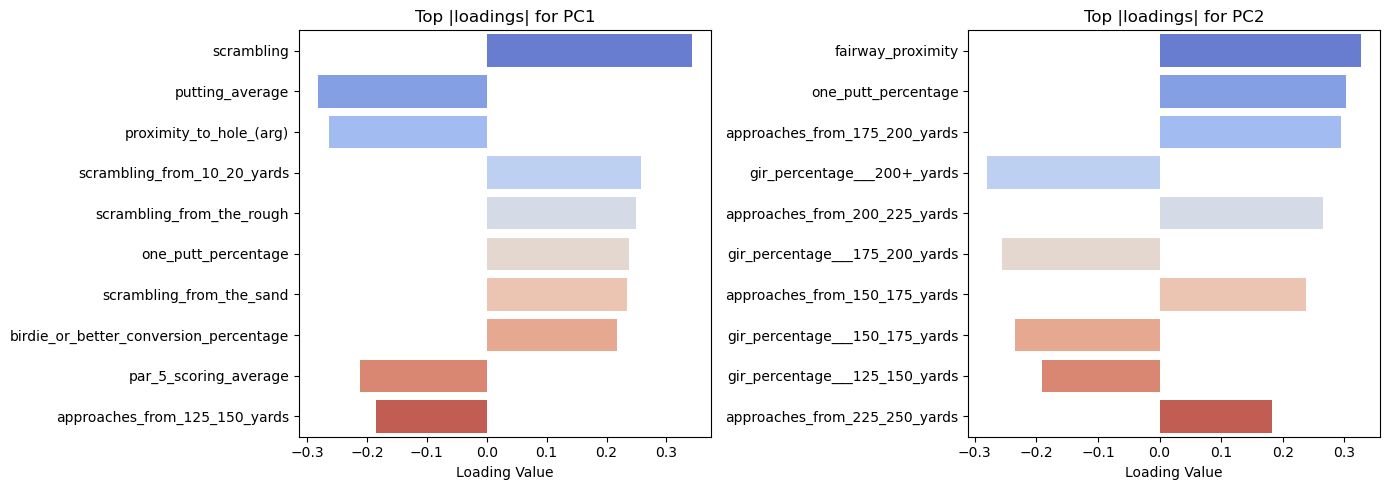

Number of components for 85% variance: 21
Explained variance: [0.13914934 0.1247733  0.10568344 0.05545365 0.04584604 0.03534915
 0.02991916 0.02813744 0.02692549 0.02605533 0.02595729 0.02495907
 0.02467626 0.02412338 0.0231325  0.02265955 0.02173261 0.02087892
 0.0205514  0.01917397 0.01885641]


In [46]:
pca_df.drop(columns=[col for col in pca_df.columns if col.startswith("sg_")], inplace=True)
pca_df.drop(columns=par5_aggressiveness, inplace=True)
pca_df.drop(columns=scoring_cols, inplace=True)


passthrough_cols = ['player', 'year']
X = pca_df.drop(columns=passthrough_cols)
feature_names = X.columns.tolist()

scaler = StandardScaler()
Xz = scaler.fit_transform(X)

pca = PCA(n_components=0.85, random_state=0)
PCs = pca.fit_transform(Xz)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

pcs_to_plot = ['PC1', 'PC2']

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False)

for ax, pc in zip(axes, pcs_to_plot):
    loadings_sorted = (
        loadings[pc]
        .sort_values(key=abs, ascending=False)
        .head(10)
    )
    
    sns.barplot(
        x=loadings_sorted.values,
        y=loadings_sorted.index,
        palette='coolwarm',
        ax=ax
    )
    
    ax.set_title(f'Top |loadings| for {pc}')
    ax.set_xlabel('Loading Value')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

print("Number of components for 85% variance:", pca.n_components_)
print("Explained variance:", pca.explained_variance_ratio_)


In [47]:
loadings_sorted = loadings['PC1'].sort_values(key=abs, ascending=False).head(10)

loadings_sorted

scrambling                                0.342358
putting_average                          -0.282286
proximity_to_hole_(arg)                  -0.263312
scrambling_from_10_20_yards               0.257463
scrambling_from_the_rough                 0.248648
one_putt_percentage                       0.237420
scrambling_from_the_sand                  0.233339
birdie_or_better_conversion_percentage    0.216593
par_5_scoring_average                    -0.210919
approaches_from_125_150_yards            -0.185710
Name: PC1, dtype: float64

In [48]:
pc_cols = [f"PC{i+1}" for i in range(pca.n_components_)]
pc_df = pd.DataFrame(PCs, columns=pc_cols, index=pca_df.index)

In [49]:
baseline_pca_df = pd.concat([pca_df[passthrough_cols], pc_df], axis=1)

In [50]:
baseline_pca_df.head()

,player,year,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,Aaron Baddeley,2015,1.355346,3.687376,2.017933,0.435297,-0.160790,0.410147,0.564564,0.684725,...,-0.369047,1.915757,0.463116,-0.530592,-0.098304,-1.257822,1.301434,0.894114,0.519917,0.893162
1,Adam Hadwin,2015,-0.794726,-0.362387,-1.247578,0.532969,0.945502,1.902953,-0.140756,-0.162076,...,-0.073200,0.794905,0.724294,-0.482574,0.713871,-0.563890,0.389653,0.242217,0.303609,-0.123329
2,Adam Scott,2015,-2.657396,-1.958761,-0.153433,-0.200303,-0.060538,-1.655521,1.336047,-2.722247,...,0.657684,0.242981,-0.485412,-0.782087,-0.603006,-0.333974,1.704887,0.010109,-0.669986,-1.608288
3,Alex Cejka,2015,0.453276,-0.765508,-2.783227,-1.387559,-1.115459,0.411952,-0.582996,0.312376,...,-0.467062,-1.026887,0.130377,-0.297423,0.676884,0.561417,0.225679,-0.596656,-1.425167,0.013931
4,Alex Prugh,2015,-2.304318,-3.107268,-1.139301,1.253235,1.899689,-1.820326,-1.246986,0.297495,...,0.310008,0.094491,0.018297,-0.642663,0.273951,0.650851,0.001850,-0.384842,0.284840,1.112326


In [51]:
baseline_pca_df.to_csv("pca_baseline_85pct.csv", index=False)

In [52]:
ott_distance = [
    # 'sg_off_the_tee',
    'driving_distance',
    'driving_accuracy_percentage'
]

In [53]:
long_irons = [
    'gir_percentage___200+_yards',
    'gir_percentage___175_200_yards',
    'approaches_from_>_275_yards',
    'approaches_from_250_275_yards',
    'approaches_from_225_250_yards',
    'approaches_from_200_225_yards',
    'approaches_from_175_200_yards',
    'fairway_proximity', # flagged
    'rough_proximity'
]

In [54]:
short_irons = [
    'gir_percentage___150_175_yards',
    'gir_percentage___125_150_yards',
    'gir_percentage___100_125_yards',
    'gir_percentage___<_100_yards',
    'approaches_from_150_175_yards',
    'approaches_from_125_150_yards',
    'approaches_from_100_125_yards',
    'approaches_from_inside_100_yards'
]


In [55]:
around_green = [
    # 'sg_around_the_green',
    'scrambling',
    'proximity_to_hole_(arg)',
    # 'sand_save_percentage',
    'scrambling_from_the_rough',
    'scrambling_from_the_sand',
    'scrambling_from_<_10_yards',
    'scrambling_from_10_20_yards',
    'scrambling_from_20_30_yards',
    'scrambling_from_>_30_yards'
]

In [56]:
putting = [
    # 'sg_putting',
    'putting_average',
    'one_putt_percentage',
    '3_putt_avoidance___10_15\'',
    '3_putt_avoidance___15_20\'',
    '3_putt_avoidance___20_25\'',
    '3_putt_avoidance_>_25\'',
    'average_distance_of_putts_made'
]

In [57]:
pca_df.head()

,year,player,par_5_scoring_average,driving_distance,driving_accuracy_percentage,going_for_the_green,gir_percentage___200+_yards,gir_percentage___175_200_yards,approaches_from_>_275_yards,approaches_from_250_275_yards,...,scrambling_from_>_30_yards,scrambling_from_20_30_yards,putting_average,one_putt_percentage,birdie_or_better_conversion_percentage,3_putt_avoidance___10_15',3_putt_avoidance___15_20',3_putt_avoidance___20_25',3_putt_avoidance_>_25',average_distance_of_putts_made
0,2015,Aaron Baddeley,4.57,294.1,0.5029,0.5427,0.3464,0.6164,72.000000,58.333333,...,0.3196,0.6374,1.744,0.4272,0.3152,0.0113,0.0141,0.0114,0.0662,79.416667
1,2015,Adam Hadwin,4.68,288.2,0.6543,0.5086,0.5063,0.5748,93.333333,70.000000,...,0.2710,0.5244,1.772,0.3793,0.2830,0.0045,0.0058,0.0214,0.0886,78.166667
2,2015,Adam Scott,4.58,311.6,0.6069,0.6126,0.3867,0.6145,99.083333,74.250000,...,0.2778,0.4063,1.806,0.3588,0.3005,0.0247,0.0000,0.0408,0.1623,74.166667
3,2015,Alex Cejka,4.67,283.3,0.6378,0.4207,0.4138,0.5204,100.916667,67.000000,...,0.2584,0.5795,1.765,0.3931,0.2897,0.0090,0.0063,0.0238,0.1107,69.500000
4,2015,Alex Prugh,4.61,295.2,0.6203,0.5178,0.5267,0.5738,77.166667,70.916667,...,0.2297,0.5063,1.792,0.3389,0.2790,0.0000,0.0071,0.0078,0.0904,66.083333


In [58]:
pca_df.drop(columns=[col for col in pca_df.columns if col.startswith("sg_")], inplace=True)

In [59]:

# a helper method to reduce the skill areas and rename the column with the _PC# suffix
def pca_reduce_with_prefix(df, cols, prefix, n_components=1):
    pc_df, pca_obj, pc_cols, var_exp = pca_reduce(df, cols, n_components)

    # rename columns to prefix_PC1, prefix_PC2
    pc_df = pc_df.rename(columns={c: f"{prefix}_{c}" for c in pc_cols})

    return pc_df, pca_obj, pc_cols, var_exp

def pca_reduce(df, cols, n_components=1):
    X = df[cols].dropna()
    scaler = StandardScaler()
    Xz = scaler.fit_transform(X)

    pca = PCA(n_components=min(n_components, len(cols)))
    pcs = pca.fit_transform(Xz)

    pc_cols = [f"PC{i+1}" for i in range(pca.n_components_)]
    pc_df = pd.DataFrame(np.nan, index=df.index, columns=pc_cols)
    pc_df.loc[X.index] = pcs

    var_exp = pca.explained_variance_ratio_

    return pc_df, pca, pc_cols, var_exp

In [60]:
def plot_loadings(pca, feature_names, pc_cols, n=12, title_prefix=""):
    loadings = pd.DataFrame(
        pca.components_.T,
        index=feature_names,
        columns=pc_cols
    )

    for pc in pc_cols:
        load_sorted = loadings[pc].sort_values(key=np.abs, ascending=False).head(n)

        plt.figure(figsize=(8,5))
        sns.barplot(
            x=load_sorted.values,
            y=load_sorted.index,
            palette="coolwarm",
            orient="h"
        )
        plt.title(f"{title_prefix}: Top |loadings| for {pc}")
        plt.xlabel("Loading Value")
        plt.tight_layout()
        plt.show()

In [61]:
ott_pcs, pca_ott, ott_pc_cols, ott_var = pca_reduce_with_prefix(pca_df, ott_distance, "ott")
long_pcs, pca_long, long_pc_cols, long_var = pca_reduce_with_prefix(pca_df, long_irons, "long")
short_pcs, pca_short, short_pc_cols, short_var = pca_reduce_with_prefix(pca_df, short_irons, "short")
arg_pcs, pca_arg, arg_pc_cols, arg_var = pca_reduce_with_prefix(pca_df, around_green, "arg")
putt_pcs, pca_putt, putt_pc_cols, putt_var = pca_reduce_with_prefix(pca_df, putting, "putt")

In [62]:
pca_df.head()

,year,player,par_5_scoring_average,driving_distance,driving_accuracy_percentage,going_for_the_green,gir_percentage___200+_yards,gir_percentage___175_200_yards,approaches_from_>_275_yards,approaches_from_250_275_yards,...,scrambling_from_>_30_yards,scrambling_from_20_30_yards,putting_average,one_putt_percentage,birdie_or_better_conversion_percentage,3_putt_avoidance___10_15',3_putt_avoidance___15_20',3_putt_avoidance___20_25',3_putt_avoidance_>_25',average_distance_of_putts_made
0,2015,Aaron Baddeley,4.57,294.1,0.5029,0.5427,0.3464,0.6164,72.000000,58.333333,...,0.3196,0.6374,1.744,0.4272,0.3152,0.0113,0.0141,0.0114,0.0662,79.416667
1,2015,Adam Hadwin,4.68,288.2,0.6543,0.5086,0.5063,0.5748,93.333333,70.000000,...,0.2710,0.5244,1.772,0.3793,0.2830,0.0045,0.0058,0.0214,0.0886,78.166667
2,2015,Adam Scott,4.58,311.6,0.6069,0.6126,0.3867,0.6145,99.083333,74.250000,...,0.2778,0.4063,1.806,0.3588,0.3005,0.0247,0.0000,0.0408,0.1623,74.166667
3,2015,Alex Cejka,4.67,283.3,0.6378,0.4207,0.4138,0.5204,100.916667,67.000000,...,0.2584,0.5795,1.765,0.3931,0.2897,0.0090,0.0063,0.0238,0.1107,69.500000
4,2015,Alex Prugh,4.61,295.2,0.6203,0.5178,0.5267,0.5738,77.166667,70.916667,...,0.2297,0.5063,1.792,0.3389,0.2790,0.0000,0.0071,0.0078,0.0904,66.083333


In [63]:
all_pcs_df = pd.concat([
    pca_df[['player', 'year']],  # passthrough identifying columns
    ott_pcs,
    long_pcs,
    short_pcs,
    arg_pcs,
    putt_pcs,
], axis=1)

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_56696/157598348.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


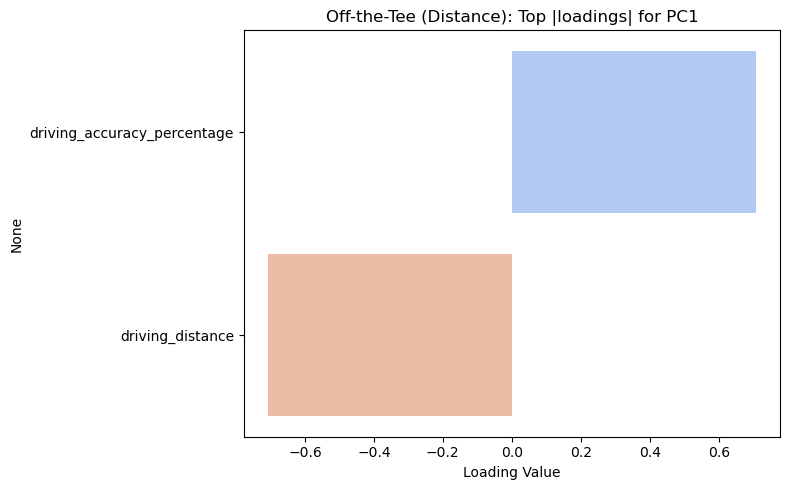

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_56696/157598348.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


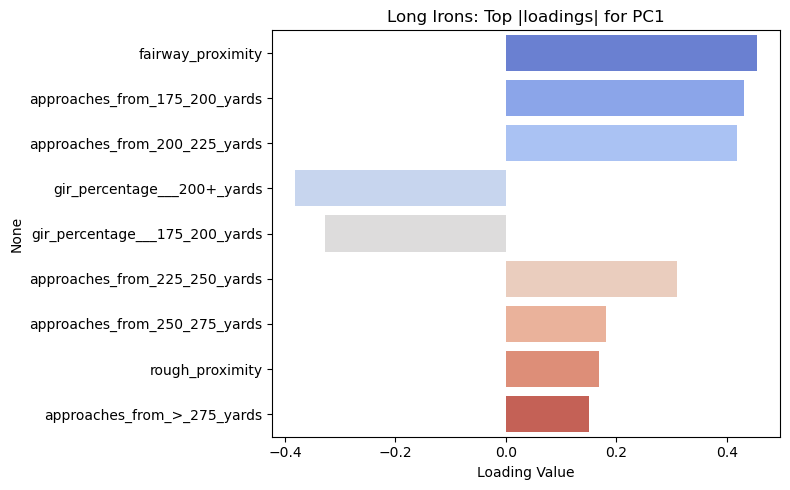

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_56696/157598348.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


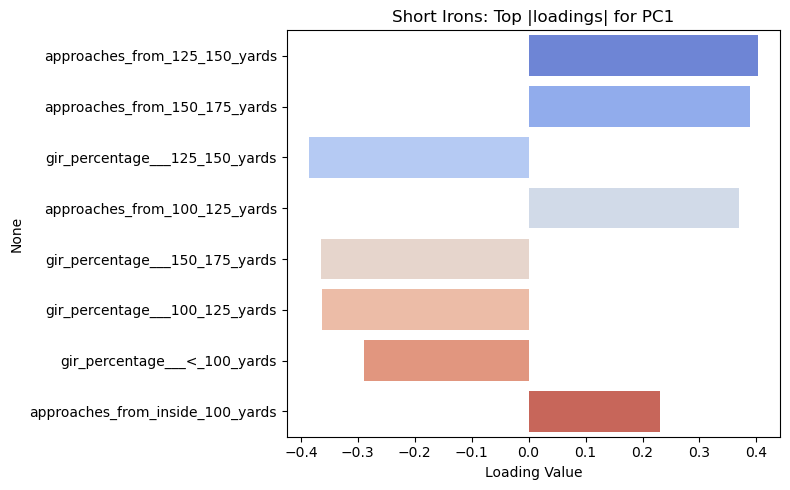

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_56696/157598348.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


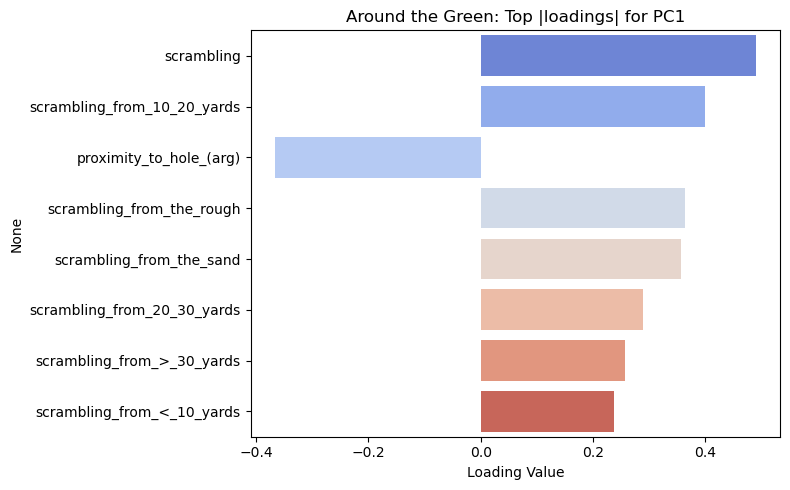

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_56696/157598348.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


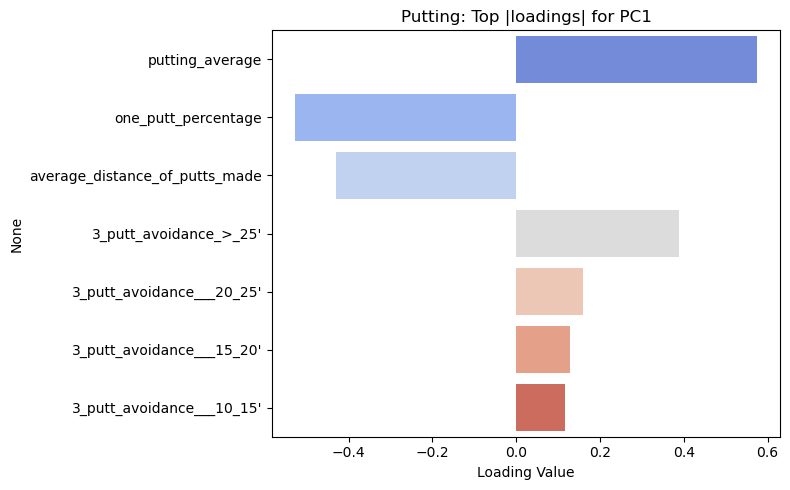

In [64]:
plot_loadings(pca_ott, ott_distance, ott_pc_cols, title_prefix="Off-the-Tee (Distance)")
plot_loadings(pca_long, long_irons, long_pc_cols, title_prefix="Long Irons")
plot_loadings(pca_short, short_irons, short_pc_cols, title_prefix="Short Irons")
plot_loadings(pca_arg, around_green, arg_pc_cols, title_prefix="Around the Green")
plot_loadings(pca_putt, putting, putt_pc_cols, title_prefix="Putting")

In [65]:
def plot_variance_hist(var_exp, title):
    pc_names = [f"PC{i+1}" for i in range(len(var_exp))]
    cumulative = var_exp.cumsum()

    plt.figure(figsize=(6,4))
    sns.barplot(x=pc_names, y=var_exp)
    
    for i, v in enumerate(var_exp):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

    plt.title(f"{title}: Variance Explained by PC1 & PC2")
    plt.ylabel("Proportion of Variance")
    plt.ylim(0, 1)
    plt.show()

    print(f"{title} — PC1: {var_exp[0]:.2f}, PC2: {var_exp[1] if len(var_exp)>1 else 0:.2f}, Total: {cumulative[-1]:.2f}")


In [66]:
categories = [
    "Off-the-Tee",
    "Long Irons",
    "Short Irons",
    "Around Green",
    "Putting",
]

totals = [
    sum(ott_var),
    sum(long_var),
    sum(short_var),
    sum(arg_var),
    sum(putt_var),
]

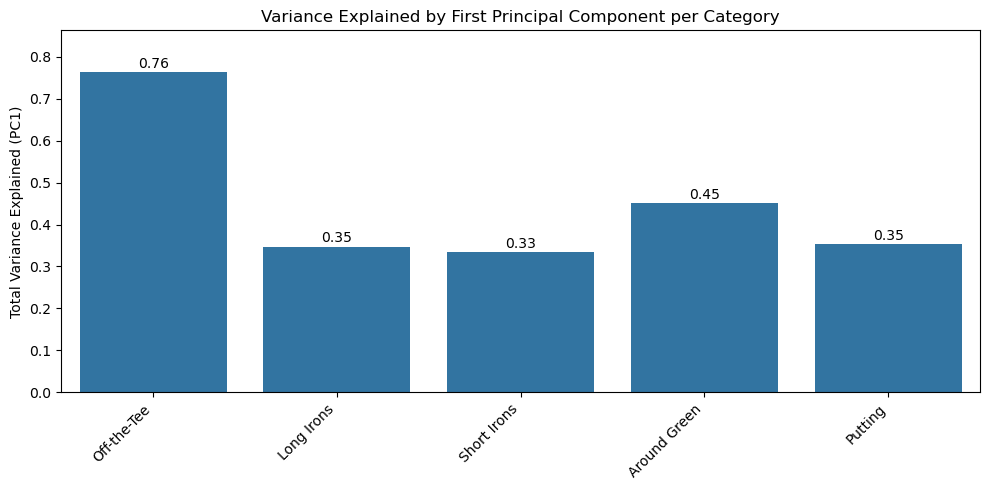

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x=categories, y=totals)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Variance Explained (PC1)")
plt.title("Variance Explained by First Principal Component per Category")

for i, v in enumerate(totals):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.ylim(0, max(totals) + 0.1)
plt.tight_layout()
plt.show()


In [68]:
all_pcs_df.shape

(2058, 7)

In [69]:
all_pcs_df.to_csv("pca_reduced_data.csv", index=False)

In [70]:
all_pcs_df.head()

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1
0,Aaron Baddeley,2015,-1.245403,1.365358,1.944796,2.057671,-2.445307
1,Adam Hadwin,2015,1.280056,-0.697110,0.682807,-0.590203,-0.265212
2,Adam Scott,2015,-1.119878,0.719802,-0.493721,-2.054937,3.067988
3,Alex Cejka,2015,1.418699,-0.323083,-1.084762,0.338617,0.653147
4,Alex Prugh,2015,0.289179,-0.776559,-1.524262,-3.034307,2.297580


In [71]:
# Flip principal components with counterintuitive loadings
all_pcs_df["long_PC1"] = -all_pcs_df["long_PC1"]
all_pcs_df["short_PC1"] = -all_pcs_df["short_PC1"]
all_pcs_df["putt_PC1"] = -all_pcs_df["putt_PC1"]

In [72]:
all_pcs_df.describe()

,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1
count,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03
mean,2019.970845,0.000000,1.381035e-17,3.452589e-18,-4.143106e-17,-5.524142e-17
std,3.127361,1.235561,1.768539e+00,1.633792e+00,1.898776e+00,1.574255e+00
min,2015.000000,-3.515357,-9.920769e+00,-1.085138e+01,-7.529761e+00,-5.902249e+00
25%,2017.000000,-0.875714,-1.098412e+00,-9.819708e-01,-1.225813e+00,-1.049047e+00
50%,2020.000000,-0.004314,8.835666e-02,7.705168e-02,1.495207e-02,5.640364e-02
75%,2023.000000,0.861275,1.200524e+00,1.050091e+00,1.332881e+00,1.035681e+00
max,2025.000000,3.888010,6.289819e+00,5.667703e+00,6.347008e+00,5.885294e+00


In [73]:
from sklearn.preprocessing import StandardScaler

pc1_cols = ["long_PC1", "short_PC1", "arg_PC1",
            "putt_PC1"]

pcs_raw = all_pcs_df[pc1_cols]


scaler = StandardScaler()
pcs_scaled = pd.DataFrame(
    scaler.fit_transform(pcs_raw),
    columns=[f"{c}_scaled" for c in pc1_cols],
    index=pcs_raw.index
)

def rowwise_zscore(df):
    return df.sub(df.mean(axis=1), axis=0).div(df.std(axis=1), axis=0)

pcs_relative = rowwise_zscore(pcs_scaled)
pcs_relative.columns = [f"{c}_relative" for c in pc1_cols]

cluster_df = pd.concat([
    all_pcs_df[['player', 'year', 'ott_PC1']],
    pcs_raw,
    pcs_scaled,
    pcs_relative
], axis=1)


cluster_df.to_csv("phenotype_matrix.csv", index=False)

cluster_df.head()

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1,long_PC1_scaled,short_PC1_scaled,arg_PC1_scaled,putt_PC1_scaled,long_PC1_relative,short_PC1_relative,arg_PC1_relative,putt_PC1_relative
0,Aaron Baddeley,2015,-1.245403,-1.365358,-1.944796,2.057671,2.445307,-0.772213,-1.190647,1.083946,1.553688,-0.695601,-1.004944,0.676635,1.023910
1,Adam Hadwin,2015,1.280056,0.697110,-0.682807,-0.590203,0.265212,0.394268,-0.418029,-0.310909,0.168509,1.127317,-0.973874,-0.696784,0.543340
2,Adam Scott,2015,-1.119878,-0.719802,0.493721,-2.054937,-3.067988,-0.407102,0.302267,-1.082506,-1.949324,0.392469,1.130820,-0.310528,-1.212760
3,Alex Cejka,2015,1.418699,0.323083,1.084762,0.338617,-0.653147,0.182728,0.664115,0.178378,-0.414994,0.068302,1.158073,0.058454,-1.284829
4,Alex Prugh,2015,0.289179,0.776559,1.524262,-3.034307,-2.297580,0.439203,0.933186,-1.598422,-1.459826,0.664069,1.045214,-0.908110,-0.801173


In [74]:
cluster_df.shape

(2058, 15)